# Ames Housing
## Problem Statement
C&C Siding is a company in Ames, IO that flips residential properties. They have hired me as a data scientist to determine which features in their control contribute the most to the property's.
## Data Cleaning

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 500) # This will allow me to view 500 rows in the notebook
pd.set_option('display.max_rows', 500) # This will allow me to view 500 rows in the notebook

In [3]:
df_train = pd.read_csv('./datasets/train.csv') # Reading in the training set
df_test = pd.read_csv('./datasets/test.csv') # Reading in the test set

In [4]:
df_train.shape # Checking the shape of our training data

(2051, 81)

In [5]:
df_test.shape # Checking the shape of our test data

(878, 80)

In [6]:
# Quick check to see which column is in train.csv but not test.csv
for col in df_train.columns:
    if col not in df_test.columns:
        print(col)

SalePrice


Sale Price is our predictor variable.

In [7]:
df_train.head() # Peeking into our dataframe

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
# Setting the index for our data frame according to one of the columns (Id)
df_train = df_train.set_index('Id')
df_test = df_test.set_index('Id')

### Missing Values

In [9]:
# How many missing values are in each column?
df_train.isnull().sum().loc[df_train.isnull().sum() > 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [10]:
# What percent of each column are missing?
df_train.isnull().mean().loc[df_train.isnull().sum() > 0] * 100

Lot Frontage      16.089712
Alley             93.174061
Mas Vnr Type       1.072647
Mas Vnr Area       1.072647
Bsmt Qual          2.681619
Bsmt Cond          2.681619
Bsmt Exposure      2.827889
BsmtFin Type 1     2.681619
BsmtFin SF 1       0.048757
BsmtFin Type 2     2.730375
BsmtFin SF 2       0.048757
Bsmt Unf SF        0.048757
Total Bsmt SF      0.048757
Bsmt Full Bath     0.097513
Bsmt Half Bath     0.097513
Fireplace Qu      48.756704
Garage Type        5.509508
Garage Yr Blt      5.558264
Garage Finish      5.558264
Garage Cars        0.048757
Garage Area        0.048757
Garage Qual        5.558264
Garage Cond        5.558264
Pool QC           99.561190
Fence             80.497318
Misc Feature      96.830814
dtype: float64

In [11]:
df_train['Bsmt Qual'].value_counts() # Checking to see if NA (the no basement category) is put in as null values

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

In [12]:
df_train['Garage Finish'].value_counts() # Checking to see if NA (the no garage category) is put in as null values

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

Since NA is listed as one of the categories for all basement and garage categorical features in the data dictionary, and this is not showing up as a category in the value counts, NA is likely put in as null values. I will change these null values to be a category of its own.

#### Notes on Missing Values:
- Alley, Pool QC, Fence, Misc Feature, and Fireplace Quality all have missing values for nearly 50% or more of the data. These columns will be of no use to our model, and should be removed. 
- Lot Frontage has missing values for 16% of the data. This is a tougher call, but I still do not think it is enough to be useful in our model.
- After looking at the data dictionary and examining the categories found in our data for the basement and garage categorical features, I found that null values likely represent the NA category (meaning no basement or no garage). I will explore this further to be sure of this. If so, I will change these to be its own category.

In [13]:
# Dropping columns with too many missing values
df_train = df_train.drop(columns=['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Fireplace Qu', 'Lot Frontage'])
df_test = df_test.drop(columns=['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Fireplace Qu', 'Lot Frontage'])

In [14]:
bsmt_mask = [col for col in df_train.columns if col[:2] == 'Bs'] + ['Total Bsmt SF'] # Creating a mask for the basement features

In [15]:
bsmt_mask # Checking to see if the basement mask worked

['Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Total Bsmt SF']

In [16]:
garage_mask = [col for col in df_train.columns if col[:2] == 'Ga'] # Creating a mask for the garage features

In [17]:
garage_mask # Checking to see if the garage mask worked

['Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

In [18]:
bsmt_df = df_train.loc[:, bsmt_mask] # Creating a new basement df with only the basement features
bsmt_df[bsmt_df.isnull().any(axis=1)].head(20) # Viewing the rows where at least one feature is null

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Bsmt Full Bath,Bsmt Half Bath,Total Bsmt SF
Id,,,,,,,,,,,
807,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
811,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
781,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
888,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1554,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2740,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2242,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2745,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
84,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


#### Observations:
- It does seem that null values represent a house that has no basement as most have null or zeros across the board.
- There are a few rows that do have values for some an nulls for others. This most likely means that the house does have a basement but the details are missing. These must be treated differently. I will impute the numeric features with the mean or median and categorical ones with the string 'Missing' for now.

In [19]:
df_train.loc[445, ['BsmtFin Type 2']] = 'Missing'
df_train.loc[[1797, 67, 2780], ['Bsmt Exposure']] = 'Missing'

In [20]:
bsmt_cat_mask = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
bsmt_num_mask = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Total Bsmt SF']

In [21]:
#Replacing null values with string 'None' for categorical basement features
df_train[bsmt_cat_mask] = df_train[bsmt_cat_mask].replace({np.nan: 'None'})
df_test[bsmt_cat_mask] = df_test[bsmt_cat_mask].replace({np.nan: 'None'})

#Replacing null values with 0 for numerical basement features
df_train[bsmt_num_mask] = df_train[bsmt_num_mask].replace({np.nan: 0})
df_test[bsmt_num_mask] = df_test[bsmt_num_mask].replace({np.nan: 0})

In [22]:
garage_df = df_train.loc[:, garage_mask] # Creating a new basement df with only the basement features
garage_df[garage_df.isnull().any(axis=1)].head(20) # Viewing the rows where at least one feature is null

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
Id,,,,,,,
2243,NaN,NaN,NaN,0.0,0.0,NaN,NaN
330,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2278,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2235,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2084,NaN,NaN,NaN,0.0,0.0,NaN,NaN
728,NaN,NaN,NaN,0.0,0.0,NaN,NaN
781,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1492,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1514,NaN,NaN,NaN,0.0,0.0,NaN,NaN


Much like the basement features, if one of the garage values is null, all others are as well. Most likely, this means these houses have no garages. There is one observation that has a garage type and missing values for the rest. I will impute these values in the same way I did the basement features for now. 

In [23]:
df_train.loc[2237, ['Garage Cars']] = df_train['Garage Cars'].median()
df_train.loc[2237, ['Garage Area']] = df_train['Garage Area'].mean()

In [24]:
#Replacing null values with string 'None' for categorical garage features
df_train[garage_mask] = df_train[garage_mask].replace({np.nan: 'None'})
df_test[garage_mask] = df_test[garage_mask].replace({np.nan: 'None'})

In [25]:
# What percent of each column are missing? Delete after
df_train.isnull().mean().loc[df_train.isnull().sum() > 0] * 100

Mas Vnr Type    1.072647
Mas Vnr Area    1.072647
dtype: float64

In [26]:
mas_mask = ['Mas Vnr Type', 'Mas Vnr Area'] # Creating a mask for masonry veneer features

In [27]:
mas_df = df_train.loc[:, mas_mask] # Creating a new mosonry df with only the masonry features
mas_df[mas_df.isnull().any(axis=1)].head(20) # Viewing the rows where at least one feature is null

,Mas Vnr Type,Mas Vnr Area
Id,,
2393,NaN,NaN
2383,NaN,NaN
539,NaN,NaN
518,NaN,NaN
2824,NaN,NaN
1800,NaN,NaN
1455,NaN,NaN
1120,NaN,NaN
1841,NaN,NaN


In [28]:
df_train['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

None is its own category, so these are not necessarily houses with no masonry veneer walls. They could be, but they are likely missing values. I will impute these in the same way I did basement and garage features for now.

In [29]:
df_train.loc[df_train['Mas Vnr Area'].isnull(), ['Mas Vnr Area']] = df_train['Mas Vnr Area'].mean()
df_test.loc[df_test['Mas Vnr Area'].isnull(), ['Mas Vnr Area']] = df_test['Mas Vnr Area'].mean()

In [30]:
df_train.loc[df_train['Mas Vnr Type'].isnull(), ['Mas Vnr Type']] = 'Missing'
df_test.loc[df_test['Mas Vnr Type'].isnull(), ['Mas Vnr Type']] = 'Missing'

In [31]:
df_train.isnull().sum().loc[df_train.isnull().sum() > 0] # Making sure there are no more null values for train and test

Series([], dtype: int64)

In [32]:
df_test.isnull().sum().loc[df_test.isnull().sum() > 0]

Electrical    1
dtype: int64

There is one missing value for Electrical in the test set. I will label it missing for now.

In [33]:
df_test.loc[df_test['Electrical'].isnull(), ['Electrical']] = 'Missing'

### Data Types

In [34]:
df_train.dtypes # Checking to make sure data types are correct

PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Area             int64
Street              object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
H

Garage Cars and Garage Areas should be numeric data types.

In [35]:
df_train['Garage Cars'] = df_train['Garage Cars'].map(lambda x: float(x))
df_test['Garage Cars'] = df_test['Garage Cars'].map(lambda x: float(x))
df_train['Garage Area'] = df_train['Garage Area'].map(lambda x: float(x))
df_test['Garage Area'] = df_test['Garage Area'].map(lambda x: float(x))

### Outliers
When doing EDA, I noticed that there were outliers in 'Total Bsmt SF', '1st Flr SF', and 'Gr Liv Area'. I found that the two outliers in these columns were the same observations, so I tried taking these out and it improved my model quite a bit. Thus, I will remove these.

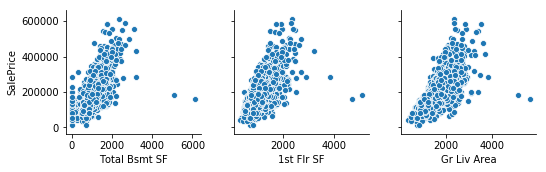

In [36]:
sns.pairplot(df_train, y_vars=['SalePrice'], x_vars=['Total Bsmt SF', '1st Flr SF', 'Gr Liv Area']);

In [37]:
df_train = df_train.drop([1499, 2181]) # Dropping outliers

### Property Type
My target audience is people who are flipping residential houses, so I will remove the properties that are not residential properties.

In [38]:
df_train['MS Zoning'].value_counts() # Checking to see what the residential properties are labeled as

RL         1596
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [39]:
df_train = df_train.loc[df_train['MS Zoning'].isin(['RL', 'RM', 'RH'])] # Creating a new data frame with only residential properties

In [40]:
df_train.shape # Checking the shape

(1926, 74)

### Export

In [41]:
# Saving the cleaned data to new datasets
df_train.to_csv("./datasets/train_clean_r.csv")
df_test.to_csv("./datasets/test_clean_r.csv")